# 🔲 Linear SVM from Scratch (Soft-Margin)
Find the **widest street** between two classes—no cars, just math!

## 🔍 What Does an SVM Do?
- Looks for a **straight line** that **best separates** two groups.  
- Tries to keep the **widest empty gap** (margin) between them.  
- Allows a few **mistakes** with a **hinge penalty** (soft-margin).  
- Learns by **tweaking weights** a little each time it sees an error.


## 🧮 Model in 3 Lines
**Decision:**  
f(x) = w·x − b

**Prediction:**  
ŷ = sign(f(x))   →  +1  or  −1

**Margin rule (for true label y):**  
y · f(x) ≥ 1   →  happy (inside margin or on the correct side)  
y · f(x) < 1   →  sad (needs a penalty)

## ⚖️ Soft-Margin Hinge Loss
For one sample:

Loss = max(0, 1 − y (w·x − b))   ← hinge error

Total cost we minimise:

Cost = (λ ‖w‖²)  +  (average hinge loss)

λ (lambda) = how much we **care about width** vs. **training mistakes**

## 🔄 Gradient Descent Updates
If sample is **correct and outside margin** (y·f ≥ 1):

w ← w − 2 λ lr w        (just shrink weights for width)

Else (y·f < 1):

w ← w − lr (2 λ w − y x)  
b ← b − lr (−y)

In [1]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        y_ = np.where(y <= 0, -1, 1)          # turn 0/1 into -1/+1
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                decision = y_[idx] * (np.dot(x_i, self.w) - self.b)
                if decision >= 1:                       # correct & outside margin
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:                                   # inside margin or wrong
                    self.w -= self.lr * (2 * self.lambda_param * self.w - y_[idx] * x_i)
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

## 🧪 Toy Data – Two Blobs
We create two nice clouds; labels -1 and +1.

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(n_samples=50, n_features=2,
                           centers=2, cluster_std=1.05,
                           random_state=40)
y = np.where(y == 0, -1, 1)

## 🎯 Train & Inspect
No scikit-learn, just our own code.

In [3]:
clf = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
clf.fit(X, y)
print("Learned weights:", clf.w)
print("Learned bias:", clf.b)

Learned weights: [0.58977016 0.17946483]
Learned bias: -0.1520000000000001


## 🎨 Visualise the Three Lines
Middle yellow = decision boundary  
Outer black = margin gutters (distance 1/‖w‖ away)

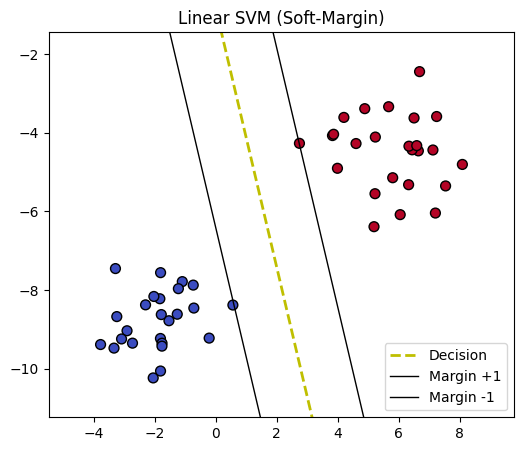

In [4]:
def plot_svm(X, y, model):
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=50, edgecolors="k")

    # decision boundary: w0 x0 + w1 x1 - b = 0  →  x1 = (b - w0 x0)/w1
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x0 = np.linspace(x0_min, x0_max, 200)

    def line(x0, offset):
        return (model.b - model.w[0] * x0 + offset) / model.w[1]

    plt.plot(x0, line(x0, 0), "y--", lw=2, label="Decision")    # f(x)=0
    plt.plot(x0, line(x0, 1), "k-", lw=1, label="Margin +1")    # f(x)=+1
    plt.plot(x0, line(x0, -1), "k-", lw=1, label="Margin -1")   # f(x)=-1

    plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
    plt.legend()
    plt.title("Linear SVM (Soft-Margin)")
    plt.show()

plot_svm(X, y, clf)

## ✅ One-Sentence Recap
SVM = **keep the widest street** while **paying a small fine** for every car that parks on the road!